## pyKO Test 8 Ice
### SES plates Al -> ice at 1500 m/s, planar, free surfaces

pyKO user manual: https://impactswiki.github.io/pyko/

Water is hard. Be careful with selection and verification of the EOS model.

Sarah T. Stewart<br>
ststewart at ucdavis.edu<br>
February 26, 2023<br>
July 5, 2023 v0.6.1<br>

In [1]:
# import the same set of modules for each test run provided with pyKO
%run import-modules

Platform:  Darwin Kernel Version 22.5.0: Thu Jun  8 22:21:34 PDT 2023; root:xnu-8796.121.3~7/RELEASE_ARM64_T8112
python version:  3.11.4
matplotlib version:  3.7.1
hvplot version:  0.8.4
numpy version:  1.25.0
pandas version:  2.0.2
pickle version:  4.0
yaml version:  6.0
pint version:  0.22
pyko version:  v0.6.1-2023-07-04

/usr/local/bin/gfortran

GNU Fortran (GCC) 12.1.0
Copyright (C) 2022 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.




## First check that the configuration file was read in correctly

In [2]:
# start with your initial guess of the EOS initial state 
# load and print the configuration file without running the simulation
# 
filein = './test8/test8-ice.yml'
# initialize the run class variable by loading the configuration file
# this loads the requires EOS tables, so you can inquire about initial states
run = RunClass(fin=filein)
# print the run class state; this will print in code units
run.checkinput()


Key nrhomin does not exist. Using default 0.8
NO SOUND SPEEDS. CALCULATING BULK SOUND SPEEDS.
Key nrhomin does not exist. Using default 0.8

pyKO v0.6.1-2023-07-04 run parameters
   All outputs are in code units 
   Input file: ./test8/test8-ice.yml 
   Output file: ./test8/pyko-test8-ice-bin-1150.dat 
   Number of materials: 2 
   Number of nodes in each material: [600 800] 
   Length of each material: [0.5 1. ] 
   Initial left edge of each material: [-0.5  0. ] 
   Boundary conditions: ['FREE', 'FREE']
   Material EOS:     ['SES', 'SES'] 
   Geometry:         PLA 
   Gravity:          0.0 
   Void pressure:    1e-09 
   Time step factor: 6 
   Stop time:        3.0

mat1 Von Mises parameters: 
   Shear modulus: 0.26 
   Yield stress: 0.0020700000000000002

mat1 Fracture parameters [code units]: 
   Fracture pressure: 0.0027600000000000003 
   Fracture maximum distension (rhomin/rhoref): 0.8

Class SESAME [code units]: Aluminum 6061 
   eos_table module version v1.1.5 
   table path:

## Check the initial state for the Al flyer

test.ieos[0] refers to the 0th=first material, the Al flyer


In [3]:
# query the SESAME table for the correct pressure and sp. internal energy
# given an initial density and temperature
p,u,cs = run.ieos[0].onepuc(2.7,298)
# p and u are in code units: Mbar and eu/g
print('\n****************')
print('For specified rho and T combination, the table EOS pressure and internal energy are = ',p, u)
# use pint to help you convert code units internal energy to mks
ureg.define('eu = 1.0E12 ergs') 
utmp = Q_(u,'eu/g') # creates a variable utmp that has pint units information
print('internal energy in code units: ',utmp) # prints the value and units
print('internal energy in mks units: ',utmp.to('J/kg')) # prints the value and units
ptmp = Q_(p,'Mbar') # creates a variable ptmp that has pint units information
print('pressure in code units: ',ptmp) # prints the value and units
print('pressure in mks units: ',ptmp.to('Pa')) # prints the value and units
cstmp = Q_(cs,'cm/microsecond')
print('bulk sound speed in code units: ',cstmp) # prints the value and units
print('bulk sound speed in mks units: ',cstmp.to('m/s')) # prints the value and units



****************
For specified rho and T combination, the table EOS pressure and internal energy are =  2.3113752999999998e-06 0.0015514308799999996
internal energy in code units:  0.0015514308799999996 eu / gram
internal energy in mks units:  155143.08799999996 joule / kilogram
pressure in code units:  2.3113752999999998e-06 megabar
pressure in mks units:  231137.52999999997 pascal
bulk sound speed in code units:  0.518892471 centimeter / microsecond
bulk sound speed in mks units:  5188.92471 meter / second


## Check the initial state for the ice target

test.ieos[1] refers to the 2nd material, the ice target


In [4]:
# query the SESAME table for the correct pressure and sp. internal energy
# given an initial density and temperature
p,u,cs = run.ieos[1].onepuc(0.915,150)
# p and u are in code units: Mbar and eu/g
print('\n****************')
print('For specified rho and T combination, the table EOS pressure and internal energy are = ',p, u)
# use pint to help you convert code units internal energy to mks
ureg.define('eu = 1.0E12 ergs') 
utmp = Q_(u,'eu/g') # creates a variable utmp that has pint units information
print('internal energy in code units: ',utmp) # prints the value and units
print('internal energy in mks units: ',utmp.to('J/kg')) # prints the value and units
ptmp = Q_(p,'Mbar') # creates a variable ptmp that has pint units information
print('pressure in code units: ',ptmp) # prints the value and units
print('pressure in mks units: ',ptmp.to('Pa')) # prints the value and units
cstmp = Q_(cs,'cm/microsecond')
print('bulk sound speed in code units: ',cstmp) # prints the value and units
print('bulk sound speed in mks units: ',cstmp.to('m/s')) # prints the value and units



****************
For specified rho and T combination, the table EOS pressure and internal energy are =  5.896367950000001e-17 0.0009497292399999999
internal energy in code units:  0.0009497292399999999 eu / gram
internal energy in mks units:  94972.92399999998 joule / kilogram
pressure in code units:  5.896367950000001e-17 megabar
pressure in mks units:  5.896367950000001e-06 pascal
bulk sound speed in code units:  0.33049999999999996 centimeter / microsecond
bulk sound speed in mks units:  3304.9999999999995 meter / second


In [5]:

filein = './test8/test8-ice.yml'

%time pyko.run(fin=filein,usertstepscale=2.,verbose=True)

Key nrhomin does not exist. Using default 0.8
NO SOUND SPEEDS. CALCULATING BULK SOUND SPEEDS.
Key nrhomin does not exist. Using default 0.8

pyKO v0.6.1-2023-07-04 run parameters
   All outputs are in code units 
   Input file: ./test8/test8-ice.yml 
   Output file: ./test8/pyko-test8-ice-bin-1150.dat 
   Number of materials: 2 
   Number of nodes in each material: [600 800] 
   Length of each material: [0.5 1. ] 
   Initial left edge of each material: [-0.5  0. ] 
   Boundary conditions: ['FREE', 'FREE']
   Material EOS:     ['SES', 'SES'] 
   Geometry:         PLA 
   Gravity:          0.0 
   Void pressure:    1e-09 
   Time step factor: 6 
   Stop time:        3.0

mat1 Von Mises parameters: 
   Shear modulus: 0.26 
   Yield stress: 0.0020700000000000002

mat1 Fracture parameters [code units]: 
   Fracture pressure: 0.0027600000000000003 
   Fracture maximum distension (rhomin/rhoref): 0.8

Class SESAME [code units]: Aluminum 6061 
   eos_table module version v1.1.5 
   table path:

## Load python KO results

In [6]:
# pyko output filename is in the input file
pykofileout = run.outputfilename
# initialize a class object to hold the output data
pko = [] # this variable will hold a plain (no units) pandas datafram for plotting
pkodata = OutputClass() # pandas + pint dataframe to read the pickled output data
#
# function to convert the stored pandas structure with pint units to a normal panda file
# hvplot tools do not work with a panda+pint file
# this also lets the user select a subset of variables to read into this notebook
def pyko_to_normal_panda(pkodata):
    df = pd.DataFrame({
            "j"    : pkodata.j.magnitude,
            "stepn" : pkodata.stepn.magnitude,
            "time" : pkodata.time.magnitude,
            "mat" : pkodata.mat.magnitude,
            "pos" : pkodata.pos.magnitude,
            "rho0" : pkodata.rho0.magnitude,
            "rho" : pkodata.rho.magnitude,
            "up" : pkodata.up.magnitude,
            "ie" : pkodata.ie.magnitude,
            "pres" : pkodata.pres.magnitude,
            "mass" : pkodata.mass.magnitude,
            "temp" : pkodata.temp.magnitude,
            "cs" : pkodata.alocal.magnitude,
            "sigmar" : pkodata.sigmar.magnitude,
            "sigmao" : pkodata.sigmao.magnitude,
            "etot" : pkodata.etot.magnitude,
            "dtminj" : pkodata.dtminj.magnitude,
            "phase" : pkodata.phase.magnitude,
            })
    return df
#
# loop through all the pickle dumps to read in the simulation data
# concat onto a pandas dataframe that stores the variables vs. time
with open(pykofileout,"rb") as f:
    pkodata = pickle.load(f) # keeps units
    if 1:
        # print units
        print('pyKO output file units are the same as the input file units:')
        print('   Time        ',pkodata.time.units)
        print('   Position    ',pkodata.pos.units)
        print('   Density     ',pkodata.rho.units)
        print('   Part. vel.  ',pkodata.up.units)
        print('   Int. energy ',pkodata.ie.units)
        print('   Mass        ',pkodata.mass.units)
        print('   Temperature ',pkodata.temp.units)
        print('   Sound speed ',pkodata.alocal.units)
        print('   Pressure    ',pkodata.pres.units)
        print('   Stress      ',pkodata.sigmar.units)
    pko = pyko_to_normal_panda(pkodata)
    while True:
        try:
            pkodata = pickle.load(f) # keeps units but only one snapshot at a time
            pko = pd.concat([pko,pyko_to_normal_panda(pkodata)],ignore_index=True) # strips units for plotting
        except:
            break

# convert to same units as fKO for plot comparisons
# from binary in mks
pko['ie']     *= 1.E-11*pko['rho0']    # J/kg * kg/m3 -> 100 GJ/m3 = eu/cm3
pko.rename(columns={"ie": "iev0"},inplace=True)
pko['etot']   *= 1.E-8    # J/kg 10e7 erg/1000 g -> erg/g *1.e-12 -> eu/g
print('iev0 and etot converted to eu/g')
pko['time']   *= 1.0E6    # s->microseconds
pko['dtminj'] *= 1.0E6    # s->microseconds
pko['pos']    *= 1.0E2    # m->cm
pko['pres']   *= 1.E-9    # Pa -> GPa
pko['sigmar'] *= 1.E-9    # Pa -> GPa
pko['sigmao'] *= 1.E-9    # Pa -> GPa
pko['rho']    *= 1.E-3    # kg/m3 -> g/cm3
pko['rho0']   *= 1.E-3    # kg/m3 -> g/cm3

# list the columns in the dataframe
pko.columns


pyKO output file units are the same as the input file units:
   Time         second
   Position     meter
   Density      kilogram / meter ** 3
   Part. vel.   meter / second
   Int. energy  joule / kilogram
   Mass         kilogram
   Temperature  kelvin
   Sound speed  meter / second
   Pressure     pascal
   Stress       pascal
iev0 and etot converted to eu/g


Index(['j', 'stepn', 'time', 'mat', 'pos', 'rho0', 'rho', 'up', 'iev0', 'pres',
       'mass', 'temp', 'cs', 'sigmar', 'sigmao', 'etot', 'dtminj', 'phase'],
      dtype='object')

In [7]:
display(pko)

,j,stepn,time,mat,pos,rho0,rho,up,iev0,pres,mass,temp,cs,sigmar,sigmao,etot,dtminj,phase
0,1,0,0.000000,1,-0.499167,2.700,2.700,1.200000e+03,0.004402,2.370916e-04,0.000004,307.447204,0.0,0.000000e+00,0.000000e+00,0.012766,0.000000,4.0
1,3,0,0.000000,1,-0.497500,2.700,2.700,1.200000e+03,0.004402,2.370916e-04,0.000005,307.447204,0.0,0.000000e+00,0.000000e+00,0.012766,0.000000,4.0
2,5,0,0.000000,1,-0.495833,2.700,2.700,1.200000e+03,0.004402,2.370916e-04,0.000004,307.447204,0.0,0.000000e+00,0.000000e+00,0.012766,0.000000,4.0
3,7,0,0.000000,1,-0.494167,2.700,2.700,1.200000e+03,0.004402,2.370916e-04,0.000004,307.447204,0.0,0.000000e+00,0.000000e+00,0.012766,0.000000,4.0
4,9,0,0.000000,1,-0.492500,2.700,2.700,1.200000e+03,0.004402,2.370916e-04,0.000005,307.447204,0.0,0.000000e+00,0.000000e+00,0.012766,0.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21695,1391,7840,3.000336,2,0.988750,0.915,0.915,9.210175e-08,0.000869,5.896368e-15,0.000002,150.000000,3305.0,-6.922679e-11,3.481780e-11,0.012722,0.005043,-8.0
21696,1393,7840,3.000336,2,0.991250,0.915,0.915,4.174651e-09,0.000869,5.896368e-15,0.000002,150.000000,3305.0,-3.387875e-12,1.394807e-12,0.012722,0.005043,-8.0
21697,1395,7840,3.000336,2,0.993750,0.915,0.915,2.754818e-10,0.000869,5.896368e-15,0.000002,150.000000,3305.0,-4.114479e-13,-5.896368e-15,0.012722,0.005043,-8.0
21698,1397,7840,3.000336,2,0.996250,0.915,0.915,3.477852e-11,0.000869,5.896368e-15,0.000002,150.000000,3305.0,-5.717323e-14,-5.896368e-15,0.012722,0.005043,-8.0


In [8]:
print(pko['sigmar'][700:1400])

700    -1.164317e-04
701     8.145023e-04
702    -4.125578e-04
703     7.237544e-04
704    -2.875159e-03
            ...     
1395   -5.896368e-15
1396   -5.896368e-15
1397   -5.896368e-15
1398   -5.896368e-15
1399   -5.896368e-15
Name: sigmar, Length: 700, dtype: float64


In [9]:
# plotting range for position axis
xr = [-1.,1.1]

In [10]:
pko.hvplot.scatter(x='pos',y='pres',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Pressure (GPa)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (pres)

In [11]:
pko.hvplot.scatter(x='pos',y='pres',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Pressure (GPa)',xlim=xr,ylim=[1e-15,500],logy=True)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (pres)

In [12]:
pko.hvplot.scatter(x='pos',y='sigmar',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='sigma_r (GPa)',xlim=xr,ylim=[1.E-20,100],logy=True)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (sigmar)

In [13]:
pko.hvplot.scatter(x='pos',y='sigmao',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='sigma_o (GPa)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (sigmao)

In [14]:
pko.hvplot.scatter(x='pos',y='up',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Particle Velocity (m/s)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (up)

In [15]:
pko.hvplot.scatter(x='pos',y='iev0',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Internal Energy',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (iev0)

In [16]:
pko.hvplot.scatter(x='pos',y='rho',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Density (g/cm3)',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (rho)

In [17]:
pko.hvplot.scatter(x='pos',y='cs',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Sound speed (m/s)',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (cs)

In [18]:
pko.hvplot.scatter(x='pos',y='phase',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Phase ID',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (phase)

# ANEOS KPA FLAG

                                TABLE          ANEOS
     KPAQQ=STATE INDICATOR      =1, 1p    =1, 1p    (eos without melt)
                                =2, 2p lv =2, 2p liquid/solid plus vapor
                                          =4, 1p solid  (eos with melt)
                                          =5, 2p melt   (eos with melt)
                                          =6, 1p liquid (eos with melt)
                                =-1 bad value of temperature
                                =-2 bad value of density
                                =-3 bad value of material number


5-Phase H2O EOS:
```
for i in range(NewEOS.NT):
    for j in range(NewEOS.ND):
        if tmp[i,j] == ' 1':
            NewEOS.KPA[i,j] = 1.
        if tmp[i,j] == ' 6':
            NewEOS.KPA[i,j] = 2.
        if tmp[i,j] == ' 7':
            NewEOS.KPA[i,j] = 3.
        if tmp[i,j] == ' L':
            NewEOS.KPA[i,j] = 4.
        if tmp[i,j] == ' S':
            NewEOS.KPA[i,j] = 5.
        if tmp[i,j] == ' V':
            NewEOS.KPA[i,j] = 6.
        if tmp[i,j] == '16':
            NewEOS.KPA[i,j] = -1
        if tmp[i,j] == '1L':
            NewEOS.KPA[i,j] = -2
        if tmp[i,j] == '67':
            NewEOS.KPA[i,j] = -3
        if tmp[i,j] == 'ES':
            NewEOS.KPA[i,j] = -4
        if tmp[i,j] == 'L6':
            NewEOS.KPA[i,j] = -5
        if tmp[i,j] == 'L7':
            NewEOS.KPA[i,j] = -6
        if tmp[i,j] == 'S7':
            NewEOS.KPA[i,j] = -7
        if tmp[i,j] == 'V1':
            NewEOS.KPA[i,j] = -8
        if tmp[i,j] == 'VL':
            NewEOS.KPA[i,j] = -9
        if tmp[i,j] == 'ZZ':
            NewEOS.KPA[i,j] = -10
```
                                
                                

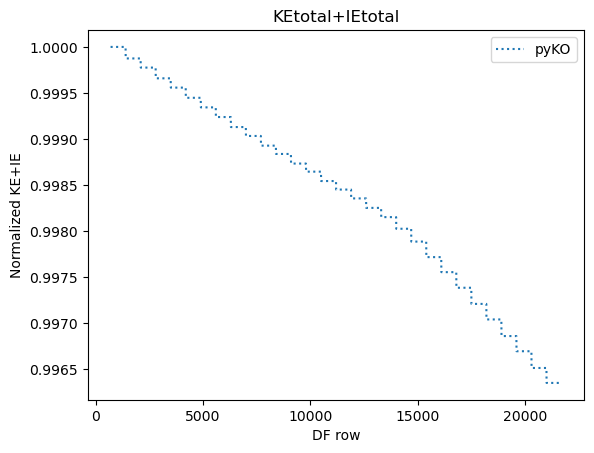

In [19]:
istart = np.where(pko['time']>0.)[0]
plt.plot(pko["etot"][istart]/pko["etot"][istart[0]],':',label='pyKO')
plt.xlabel('DF row')
plt.title('KEtotal+IEtotal')
plt.ylabel('Normalized KE+IE')
plt.legend()


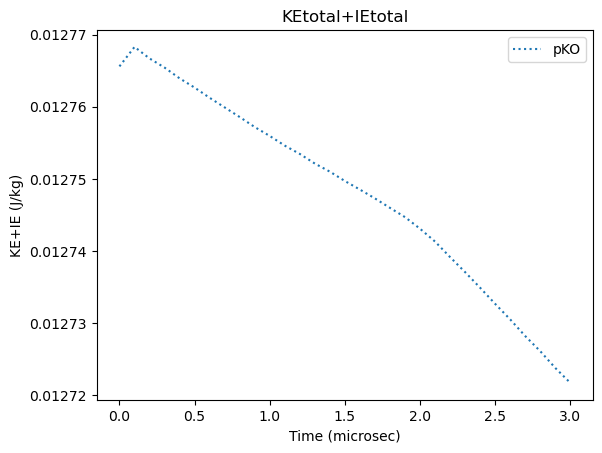

In [20]:
#plt.plot(fko['time'],fko['etot'],label='fKO')
plt.plot(pko['time'],pko['etot'],':',label='pKO')
plt.xlabel('Time (microsec)')
plt.title('KEtotal+IEtotal')
#plt.ylabel('KE+IE (eu/cm3)')
plt.ylabel('KE+IE (J/kg)')
plt.legend()


## MODEL WAVEFRONTS IN ICE

Try to recreate the wavefronts in Stewart & Ahrens JGR 2005.

https://doi.org/10.1029/2004JE002305



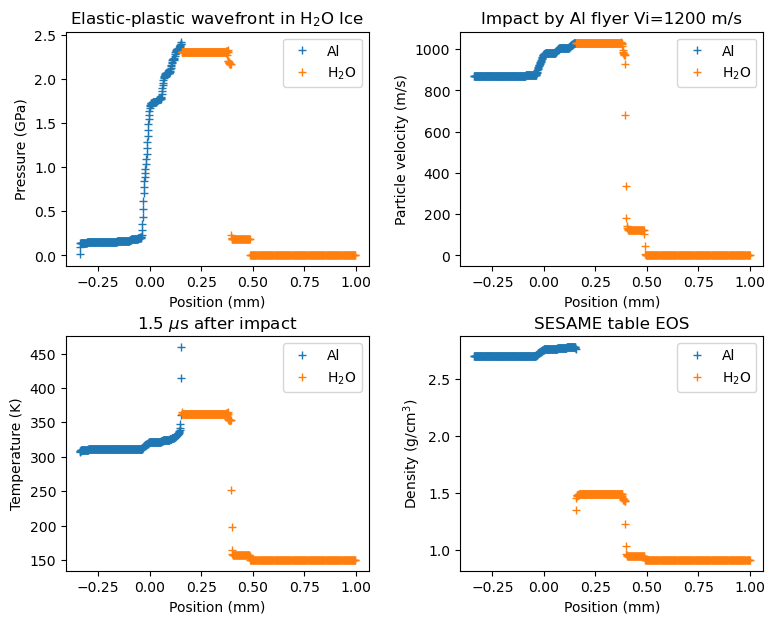

In [21]:


title='Elastic-plastic wavefront in H$_2$O Ice'

plt.rcParams["figure.figsize"] = (9,7)

figb, axs = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# add title of the problem and time to the top of the plot
axs[0,0].set_title(title)
#axs[0,0].plot(values['x'],values['p'],label='Sod')
axs[0,0].set_xlabel('Position (mm)')
axs[0,0].set_ylabel('Pressure (GPa)')
ptime = np.unique(pko["time"])
tind = 15
pindex = np.where((pko["time"] == ptime[tind]) & (pko['mat'] == 1))[0]
axs[0,0].plot(pko["pos"][pindex],pko["pres"][pindex],'+',label='Al')
pindex = np.where((pko["time"] == ptime[tind]) & (pko['mat'] == 2))[0]
axs[0,0].plot(pko["pos"][pindex],pko["pres"][pindex],'+',label='H$_2$O')
#axs[0,0].plot(pko["pos"][pindex],-pko["sigmar"][pindex],label='sig_r')
axs[0,0].legend()

axs[0,1].set_title('Impact by Al flyer Vi=1200 m/s')
#axs[0,1].plot(values['x'],values['u'],label='Sod')
axs[0,1].set_xlabel('Position (mm)')
axs[0,1].set_ylabel('Particle velocity (m/s)')
ptime = np.unique(pko["time"])
#pindex = np.where((pko["time"] == ptime[tind]))[0]
pindex = np.where((pko["time"] == ptime[tind]) & (pko['mat'] == 1))[0]
axs[0,1].plot(pko["pos"][pindex],pko["up"][pindex],'+',label='Al')
pindex = np.where((pko["time"] == ptime[tind]) & (pko['mat'] == 2))[0]
axs[0,1].plot(pko["pos"][pindex],pko["up"][pindex],'+',label='H$_2$O')
axs[0,1].legend()

axs[1,1].set_title('SESAME table EOS')
#axs[1,1].plot(values['x'],values['rho'],label='Sod')
axs[1,1].set_xlabel('Position (mm)')
axs[1,1].set_ylabel('Density (g/cm$^3$)')
ptime = np.unique(pko["time"])
#pindex = np.where((pko["time"] == ptime[tind]))[0]
pindex = np.where((pko["time"] == ptime[tind]) & (pko['mat'] == 1))[0]
axs[1,1].plot(pko["pos"][pindex],pko["rho"][pindex],'+',label='Al')
pindex = np.where((pko["time"] == ptime[tind]) & (pko['mat'] == 2))[0]
axs[1,1].plot(pko["pos"][pindex],pko["rho"][pindex],'+',label='H$_2$O')
axs[1,1].legend()

axs[1,0].set_title('1.5 $\mu$s after impact')
#axs[1,0].plot(values['x'],values['energy'],label='Sod')
axs[1,0].set_xlabel('Position (mm)')
axs[1,0].set_ylabel('Temperature (K)')
#axs[1,0].set_ylabel('Internal Energy (10^12 erg/g)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[tind]) & (pko['mat'] == 1))[0]
#axs[1,0].plot(pko["pos"][pindex],pko["iev0"][pindex]/pko["rho0"][pindex],'+',label='Al')
axs[1,0].plot(pko["pos"][pindex],pko["temp"][pindex],'+',label='Al')
pindex = np.where((pko["time"] == ptime[tind]) & (pko['mat'] == 2))[0]
#axs[1,0].plot(pko["pos"][pindex],pko["iev0"][pindex]/pko["rho0"][pindex],'+',label='H$_2$O')
axs[1,0].plot(pko["pos"][pindex],pko["temp"][pindex],'+',label='H$_2$O')
axs[1,0].legend()

figb.savefig('./test8/pyko-test8-ice.pdf',dpi=300)



In [22]:
print(ptime[15])


1.5002655942350087


End of notebook